In [0]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score



In [0]:
from google.colab import files
uploaded = files.upload()

Saving hw2_question3.csv to hw2_question3 (1).csv


In [0]:
from __future__ import print_function
# Import the dataset
dataset = pd.read_csv('hw2_question3.csv', header=None)
full_dataset = dataset.iloc[:, :].values

total_samples = len(dataset)

print('Total number of samples is {}'.format(total_samples))
print('Input shape is {}'.format(dataset.shape))


Total number of samples is 11055
Input shape is (11055, 31)


In [0]:
dataset.head(5)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [0]:
# https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
columns_to_hot_encode = [1, 6, 7, 13, 14, 15, 25, 28]

for col in columns_to_hot_encode:
    dataset[str(col)+'_neg'] = np.where(dataset[col] == -1, 1, 0)
    dataset[str(col)+'_zero'] = np.where(dataset[col] == 0, 1, 0)
    dataset[str(col)+'_pos'] = np.where(dataset[col] == 1, 1, 0)

dataset.head(5)

,0,1,2,3,4,5,6,7,8,9,...,14_pos,15_neg,15_zero,15_pos,25_neg,25_zero,25_pos,28_neg,28_zero,28_pos
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,0,0,1,0,0,0,0,1
1,1,1,1,1,1,-1,0,1,-1,1,...,0,1,0,0,0,1,0,0,0,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,0,1,0,0,0,0,1,0,1,0
3,1,0,1,1,1,-1,-1,-1,1,1,...,0,1,0,0,0,0,1,1,0,0
4,1,0,-1,1,1,-1,1,1,-1,1,...,0,1,0,0,0,1,0,0,0,1


In [0]:
dataset = dataset.drop(columns=[1, 6, 7, 13, 14, 15, 25, 28])

In [0]:
dataset.head(5)

,0,2,3,4,5,8,9,10,11,12,...,14_pos,15_neg,15_zero,15_pos,25_neg,25_zero,25_pos,28_neg,28_zero,28_pos
0,-1,1,1,-1,-1,-1,1,1,-1,1,...,1,1,0,0,1,0,0,0,0,1
1,1,1,1,1,-1,-1,1,1,-1,1,...,0,1,0,0,0,1,0,0,0,1
2,1,1,1,1,-1,-1,1,1,-1,1,...,0,1,0,0,0,0,1,0,1,0
3,1,1,1,1,-1,1,1,1,-1,-1,...,0,1,0,0,0,0,1,1,0,0
4,1,-1,1,1,-1,-1,1,1,1,1,...,0,1,0,0,0,1,0,0,0,1


In [0]:
# move the target at the end
df1 = dataset.pop(30)
dataset[30] = df1
dataset.head(5)

,0,2,3,4,5,8,9,10,11,12,...,15_neg,15_zero,15_pos,25_neg,25_zero,25_pos,28_neg,28_zero,28_pos,30
0,-1,1,1,-1,-1,-1,1,1,-1,1,...,1,0,0,1,0,0,0,0,1,-1
1,1,1,1,1,-1,-1,1,1,-1,1,...,1,0,0,0,1,0,0,0,1,-1
2,1,1,1,1,-1,-1,1,1,-1,1,...,1,0,0,0,0,1,0,1,0,-1
3,1,1,1,1,-1,1,1,1,-1,-1,...,1,0,0,0,0,1,1,0,0,-1
4,1,-1,1,1,-1,-1,1,1,1,1,...,1,0,0,0,1,0,0,0,1,1


In [0]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html
# shuffle the samples 
dataset = dataset.sample(frac=1, random_state=9728).reset_index(drop=True)
dataset.head(5)

,0,2,3,4,5,8,9,10,11,12,...,15_neg,15_zero,15_pos,25_neg,25_zero,25_pos,28_neg,28_zero,28_pos,30
0,1,1,1,1,-1,-1,-1,-1,1,1,...,1,0,0,0,0,1,0,0,1,1
1,1,1,1,1,-1,-1,1,1,1,1,...,1,0,0,1,0,0,0,1,0,1
2,-1,1,-1,1,-1,-1,-1,-1,1,1,...,0,0,1,0,0,1,0,0,1,1
3,1,1,1,1,-1,-1,1,1,1,1,...,0,0,1,0,0,1,0,1,0,1
4,1,1,-1,1,-1,-1,1,1,1,1,...,0,1,0,1,0,0,0,1,0,-1


In [0]:
# divide the sammples

total_train_samples = (int)((2/3)*total_samples)
total_test_samples = total_samples - total_train_samples

print('Total number of training samples is {}'.format(total_train_samples))
print('Total number of test samples is {}'.format(total_test_samples))

training_set = dataset.head(total_train_samples)
test_set = dataset.tail(total_test_samples)

Total number of training samples is 7370
Total number of test samples is 3685


In [0]:
training_set.head(5)

,0,2,3,4,5,8,9,10,11,12,...,15_neg,15_zero,15_pos,25_neg,25_zero,25_pos,28_neg,28_zero,28_pos,30
0,1,1,1,1,-1,-1,-1,-1,1,1,...,1,0,0,0,0,1,0,0,1,1
1,1,1,1,1,-1,-1,1,1,1,1,...,1,0,0,1,0,0,0,1,0,1
2,-1,1,-1,1,-1,-1,-1,-1,1,1,...,0,0,1,0,0,1,0,0,1,1
3,1,1,1,1,-1,-1,1,1,1,1,...,0,0,1,0,0,1,0,1,0,1
4,1,1,-1,1,-1,-1,1,1,1,1,...,0,1,0,1,0,0,0,1,0,-1


In [0]:
training_set.shape

(7370, 47)

In [0]:
test_set.shape

(3685, 47)

In [0]:
# SVM starts here
training_set_data = training_set.iloc[:, :].values
X = training_set_data[:, :-1]
y = training_set_data[:, 46]

test_set_data = test_set.iloc[:, :].values
X_test = test_set_data[:, :-1]
y_test = test_set_data[:, 46]

In [0]:
X.shape

(7370, 46)

In [0]:
y.shape

(7370,)

In [0]:
X_test.shape

(3685, 46)

In [0]:
y_test.shape

(3685,)

In [0]:
# https://pythonhow.com/measure-execution-time-python-code/
import time
# import the SVM library
from sklearn import svm

svm_classifier = svm.SVC(kernel='linear', C=1.0, gamma='scale')

start = time.time()
svm_classifier.fit(X, y)
end = time.time()

print('Time for training : ', end - start)

# Predicting the Test set results
y_pred = svm_classifier.predict(X_test)

print(accuracy_score(y_test, y_pred))

Time for training :  1.0986385345458984
0.9359565807327002


In [0]:
# K-fold validation
# code referenced from this book - https://www.manning.com/
#                           books/deep-learning-with-python
k = 3
train_data = X
train_targets = y
num_val_samples = train_data.shape[0] // k
accuracy = []
times = []

# 10^{-5},10^{-4},...,0.1, 1, 3,5,10,
C_values = [1e-5, 3e-5, 9e-5, 1e-4, 3e-4, 9e-4, 1e-3, 3e-3, 9e-3, 0.01, 0.03, 0.09, 0.1, 0.3, 0.9]
C_values = C_values + list(range(1, 51, 1)) + [5*n for n in range(11,20+1)]
training_set_copy = training_set.copy()

for c in C_values:
    all_scores = []
    all_times = []
    for i in range(k):
        val_data =\
        train_data[i * num_val_samples: (i + 1) * num_val_samples]
        val_targets =\
        train_targets[i * num_val_samples: (i + 1) * num_val_samples]

        partial_train_data = np.concatenate(
            [train_data[:i * num_val_samples],
             train_data[(i + 1) * num_val_samples:]],
            axis=0)
        partial_train_targets = np.concatenate(
            [train_targets[:i * num_val_samples],
             train_targets[(i + 1) * num_val_samples:]],
            axis=0)
        """
        print(val_data.shape)
        print(val_targets.shape)
        print(partial_train_data.shape)
        print(partial_train_targets.shape)
        """
        val_classifier = svm.SVC(kernel='linear', C=c, gamma='scale')
        
        start = time.time()
        val_classifier.fit(partial_train_data, partial_train_targets)
        end = time.time()
        
        val_pred = val_classifier.predict(val_data)
        
        acc = accuracy_score(val_targets, val_pred)
        """
        print('Time is ', end-start)
        print('Accuracy is  ', acc)
        print('-------------------------')
        """
        all_scores.append(acc)
        all_times.append(end-start)
    accuracy.append(np.mean(all_scores))
    times.append(np.mean(all_times))
    print('C is {} | Accuracy is {} | Time is {} '.format(c, np.mean(all_scores), np.mean(all_times)))    
    

C is 1e-05 | Accuracy is 0.5575461454940283 | Time is 1.7969731489817302 
C is 3e-05 | Accuracy is 0.5575461454940283 | Time is 1.7666964530944824 
C is 9e-05 | Accuracy is 0.5819761129207384 | Time is 1.661372423171997 
C is 0.0001 | Accuracy is 0.633414766558089 | Time is 1.6536303361256917 
C is 0.0003 | Accuracy is 0.9197882736156351 | Time is 1.3782199223836262 
C is 0.0009 | Accuracy is 0.9222312703583061 | Time is 0.9657611052195231 
C is 0.001 | Accuracy is 0.9214169381107492 | Time is 0.9000483353932699 
C is 0.003 | Accuracy is 0.9239956568946797 | Time is 0.566605806350708 
C is 0.009 | Accuracy is 0.9322747014115093 | Time is 0.43624194463094074 
C is 0.01 | Accuracy is 0.9324104234527688 | Time is 0.42675010363260907 
C is 0.03 | Accuracy is 0.9377035830618894 | Time is 0.36365612347920734 
C is 0.09 | Accuracy is 0.9383821932681867 | Time is 0.3307851155598958 
C is 0.1 | Accuracy is 0.9382464712269273 | Time is 0.3268265724182129 
C is 0.3 | Accuracy is 0.937839305103148

In [0]:
import operator
index, value = max(enumerate(accuracy), key=operator.itemgetter(1))
print(value)
print(C_values[index])
print('Best C is {} | Accuracy is {} | Time is {} '.format(C_values[index], value, times[index]))

0.9400108577633007
2
Best C is 2 | Accuracy is 0.9400108577633007 | Time is 0.6205991903940836 


In [0]:
svm_classifier = svm.SVC(kernel='linear', C=C_values[index], gamma='scale')

start = time.time()
svm_classifier.fit(X, y)
end = time.time()

print('Time for training : ', end - start)

# Predicting the Test set results
y_pred = svm_classifier.predict(X_test)

print(accuracy_score(y_test, y_pred))

Time for training :  1.3218326568603516
0.9367706919945726


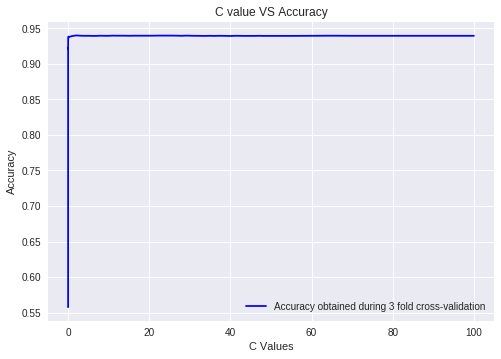

In [0]:
plt.plot(C_values, accuracy, 'b', label='Accuracy obtained during 3 fold cross-validation')
plt.title('C value VS Accuracy')
plt.xlabel('C Values')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

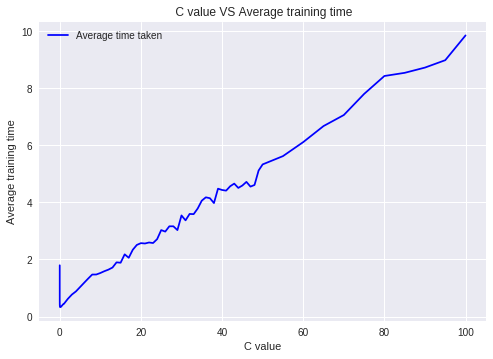

In [0]:
plt.plot(C_values, times, 'b', label='Average time taken')
plt.title(' C value VS Average training time')
plt.xlabel('C value')
plt.ylabel('Average training time')
plt.legend()
plt.show()

In [0]:
# K-fold validation
# code referenced from this book - https://www.manning.com/
#                           books/deep-learning-with-python
k = 3
train_data = X
train_targets = y
num_val_samples = train_data.shape[0] // k
accuracy = []
times = []

l1 = list(range(1, 101, 1))
# 10^{-5},10^{-4},...,0.1, 1, 3,5,10,
C_values = [1e-5, 3e-5, 9e-5, 1e-4, 3e-4, 9e-4, 1e-3, 3e-3, 9e-3, 0.01, 0.03, 0.09, 0.1, 0.3, 0.9, 1, 3] + [5*n for n in range(1,20+1)]
training_set_copy = training_set.copy()

DEGREE = [2, 3, 4, 5, 6, 7, 8, 9, 10]
best_c_value = []
best_accuray_value = []

for degree in DEGREE:
    accuracy = []
    times = []
    for c in C_values:
        all_scores = []
        all_times = []
        for i in range(k):
            val_data =\
            train_data[i * num_val_samples: (i + 1) * num_val_samples]
            val_targets =\
            train_targets[i * num_val_samples: (i + 1) * num_val_samples]

            partial_train_data = np.concatenate(
                [train_data[:i * num_val_samples],
                 train_data[(i + 1) * num_val_samples:]],
                axis=0)
            partial_train_targets = np.concatenate(
                [train_targets[:i * num_val_samples],
                 train_targets[(i + 1) * num_val_samples:]],
                axis=0)
            """
            print(val_data.shape)
            print(val_targets.shape)
            print(partial_train_data.shape)
            print(partial_train_targets.shape)
            """
            val_classifier = svm.SVC(kernel='poly', degree=degree, C=c, gamma='scale')

            start = time.time()
            val_classifier.fit(partial_train_data, partial_train_targets)
            end = time.time()

            val_pred = val_classifier.predict(val_data)

            acc = accuracy_score(val_targets, val_pred)
            """
            print('Time is ', end-start)
            print('Accuracy is  ', acc)
            print('-------------------------')
            """
            all_scores.append(acc)
            all_times.append(end-start)
        accuracy.append(np.mean(all_scores))
        times.append(np.mean(all_times))
        print('Degree is {} | C is {} | Accuracy is {} | Time is {} '.format(degree, c, np.mean(all_scores), np.mean(all_times)))
    index, value = max(enumerate(accuracy), key=operator.itemgetter(1))    
    print('Degree is {} | Best C is {} | Best Accuracy is {} | Time is {} '.format(degree, C_values[index] , value, times[index]))
    best_c_value.append(C_values[index])
    best_accuray_value.append(value)
    

Degree is 2 | C is 1e-05 | Accuracy is 0.5575461454940283 | Time is 1.7907001972198486 
Degree is 2 | C is 3e-05 | Accuracy is 0.5575461454940283 | Time is 1.7944063345591228 
Degree is 2 | C is 9e-05 | Accuracy is 0.5575461454940283 | Time is 1.806413173675537 
Degree is 2 | C is 0.0001 | Accuracy is 0.5575461454940283 | Time is 1.8181854089101155 
Degree is 2 | C is 0.0003 | Accuracy is 0.5575461454940283 | Time is 1.8185966809590657 
Degree is 2 | C is 0.0009 | Accuracy is 0.5575461454940283 | Time is 1.7658827304840088 
Degree is 2 | C is 0.001 | Accuracy is 0.5575461454940283 | Time is 1.752437988917033 
Degree is 2 | C is 0.003 | Accuracy is 0.7983170466883823 | Time is 1.7155919869740803 
Degree is 2 | C is 0.009 | Accuracy is 0.9040445168295331 | Time is 1.2705036004384358 
Degree is 2 | C is 0.01 | Accuracy is 0.907844733984799 | Time is 1.2424270311991374 
Degree is 2 | C is 0.03 | Accuracy is 0.9283387622149837 | Time is 0.9157192707061768 
Degree is 2 | C is 0.09 | Accuracy

In [0]:
print(best_c_value)
print(best_accuray_value)

[65, 5, 3, 3, 1, 0.9, 1, 0.9, 0.9]
[0.9549402823018459, 0.9594191096634094, 0.9613192182410425, 0.9640336590662324, 0.9648479913137894, 0.965798045602606, 0.9652551574375678, 0.9652551574375678, 0.96471226927253]


In [0]:
index, value = max(enumerate(best_accuray_value), key=operator.itemgetter(1))
print('Best degree is {} | Best C is {} | Accuracy is {} '.format(DEGREE[index], best_c_value[index], value))

Best degree is 7 | Best C is 0.9 | Accuracy is 0.965798045602606 


In [0]:
svm_classifier = svm.SVC(kernel='poly', degree=DEGREE[index], C=best_c_value[index], gamma='scale')

start = time.time()
svm_classifier.fit(X, y)
end = time.time()

print('Time for training : ', end - start)

# Predicting the Test set results
y_pred = svm_classifier.predict(X_test)

print(accuracy_score(y_test, y_pred))


Time for training :  1.6188414096832275
0.9712347354138399


In [0]:
# K-fold validation
# code referenced from this book - https://www.manning.com/
#                           books/deep-learning-with-python
k = 3
train_data = X
train_targets = y
num_val_samples = train_data.shape[0] // k
accuracy = []
times = []

# 10^{-5},10^{-4},...,0.1, 1, 3,5,10,
C_values = [1e-5, 3e-5, 9e-5, 1e-4, 3e-4, 9e-4, 1e-3, 3e-3, 9e-3, 0.01, 0.03, 0.09, 0.1, 0.3, 0.9]
C_values = C_values + list(range(1, 51, 1)) + [5*n for n in range(11,20+1)]
training_set_copy = training_set.copy()

for c in C_values:
    all_scores = []
    all_times = []
    for i in range(k):
        val_data =\
        train_data[i * num_val_samples: (i + 1) * num_val_samples]
        val_targets =\
        train_targets[i * num_val_samples: (i + 1) * num_val_samples]

        partial_train_data = np.concatenate(
            [train_data[:i * num_val_samples],
             train_data[(i + 1) * num_val_samples:]],
            axis=0)
        partial_train_targets = np.concatenate(
            [train_targets[:i * num_val_samples],
             train_targets[(i + 1) * num_val_samples:]],
            axis=0)
        """
        print(val_data.shape)
        print(val_targets.shape)
        print(partial_train_data.shape)
        print(partial_train_targets.shape)
        """
        val_classifier = svm.SVC(kernel='rbf', C=c, gamma='scale')
        
        start = time.time()
        val_classifier.fit(partial_train_data, partial_train_targets)
        end = time.time()
        
        val_pred = val_classifier.predict(val_data)
        
        acc = accuracy_score(val_targets, val_pred)
        """
        print('Time is ', end-start)
        print('Accuracy is  ', acc)
        print('-------------------------')
        """
        all_scores.append(acc)
        all_times.append(end-start)
    accuracy.append(np.mean(all_scores))
    times.append(np.mean(all_times))
    print('C is {} | Accuracy is {} | Time is {} '.format(c, np.mean(all_scores), np.mean(all_times)))    
    

C is 1e-05 | Accuracy is 0.5575461454940283 | Time is 2.612487316131592 
C is 3e-05 | Accuracy is 0.5575461454940283 | Time is 2.6782913208007812 
C is 9e-05 | Accuracy is 0.5575461454940283 | Time is 2.7152923742930093 
C is 0.0001 | Accuracy is 0.5575461454940283 | Time is 2.7131663958231607 
C is 0.0003 | Accuracy is 0.5575461454940283 | Time is 2.7264136473337808 
C is 0.0009 | Accuracy is 0.5575461454940283 | Time is 2.7050015926361084 
C is 0.001 | Accuracy is 0.5575461454940283 | Time is 2.7117835680643716 
C is 0.003 | Accuracy is 0.5575461454940283 | Time is 2.7215822537740073 
C is 0.009 | Accuracy is 0.8710640608034744 | Time is 2.4440512657165527 
C is 0.01 | Accuracy is 0.883686210640608 | Time is 2.3454642295837402 
C is 0.03 | Accuracy is 0.9294245385450597 | Time is 1.9800702730814617 
C is 0.09 | Accuracy is 0.9343105320304018 | Time is 1.3081767559051514 
C is 0.1 | Accuracy is 0.9351248642779587 | Time is 1.1781837940216064 
C is 0.3 | Accuracy is 0.9424538545059717 

In [0]:
import operator
index, value = max(enumerate(accuracy), key=operator.itemgetter(1))
print(value)
print(C_values[index])
print('Best C is {} | Accuracy is {} | Time is {} '.format(C_values[index], value, times[index]))

0.9630836047774158
37
Best C is 37 | Accuracy is 0.9630836047774158 | Time is 0.6008167266845703 


In [0]:
svm_classifier = svm.SVC(kernel='rbf', C=C_values[index], gamma='scale')

start = time.time()
svm_classifier.fit(X, y)
end = time.time()

print('Time for training : ', end - start)

# Predicting the Test set results
y_pred = svm_classifier.predict(X_test)

print(accuracy_score(y_test, y_pred))

Time for training :  1.2514567375183105
0.9712347354138399
